In [1]:
from matplotlib import pyplot as plt
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
import math as m
from numpy import *
import numpy

In [2]:
###David R. Rice
###Phys 604 Prof. Zhu
###Lecture 10 Homework
##Gravitation Potential with Successive Over-Relaxation (SOR)

Initializing


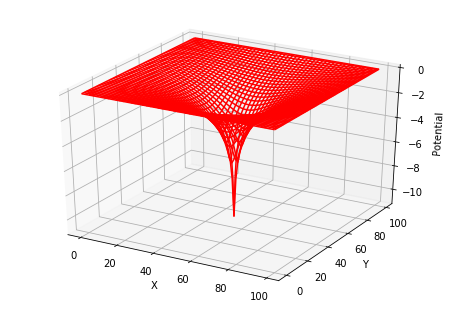

In [7]:
print("Initializing")
omega=1.8
Nmax = 100; Niter = 10000; V = zeros((Nmax, Nmax), float)   

for k in range(0, Nmax):  
    V[k,0] = 0.
    V[0,k] = 0.
    
rho=zeros((Nmax,Nmax),float)
rho[50][50]=1.
    
for iter in range(Niter):                                  
    #if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1):
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]-0.25*4.*m.pi*rho[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j]+omega*du
    #print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()    

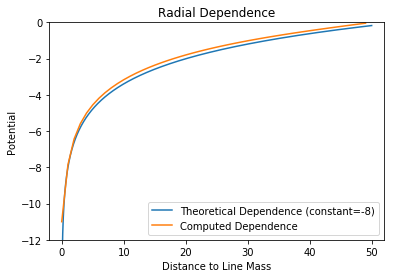

In [8]:
##Test Radial Dependency

#Theoretical Dependence 2*G*u*ln(r)+constant where G,u = 1.
#r is measured distance from line mass
r=arange(0.01,50,0.01)
plt.plot(r,2.*log(r)-8,label='Theoretical Dependence (constant=-8)')

#Computed Radial dependence, at x=50 y=[0,50]
r2=arange(0,50,1)
plt.plot(r2,V[50][50:0:-1],label='Computed Dependence')


plt.xlabel('Distance to Line Mass')
plt.ylabel('Potential')
plt.axis([-2,52,-12,0])
plt.legend()
plt.title("Radial Dependence")
plt.show()
plt.close()